<a href="https://colab.research.google.com/github/aramakrishnan-006/pytorch-notebooks/blob/main/pytorch_autoregressive_model_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [109]:
#Generating Synthetic Data

#A Sine Wave

N = 2000

# The second term introduces some noise
series = np.sin(0.1*np.arange(N)) + (np.random.randn(N) * 0.1)

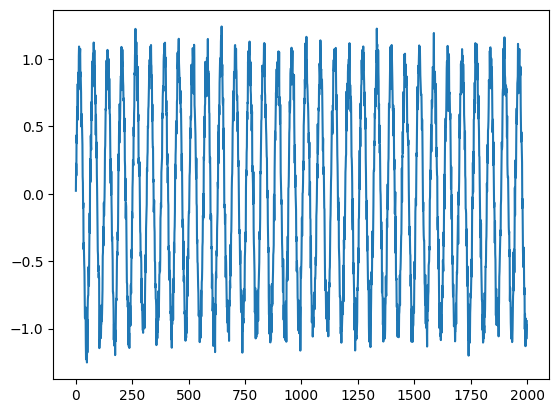

In [110]:
#Plot the data
plt.plot(series)
plt.show()

In [111]:
#Using the previous 20 values to predict the next
T = 20 #Looking back 20 values
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)

  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)

N = len(X)

print(f'X.Shape: {X.shape} Y.shape: {Y.shape}')

X.Shape: (1980, 20) Y.shape: (1980, 1)


In [112]:
Y

array([[ 0.86886045],
       [ 0.90006645],
       [ 0.82005939],
       ...,
       [-1.07602317],
       [-1.00744267],
       [-0.94411127]])

In [113]:
X

array([[ 0.02192529,  0.22314359,  0.13457071, ...,  0.83768534,
         1.03871843,  1.07413805],
       [ 0.22314359,  0.13457071,  0.43457631, ...,  1.03871843,
         1.07413805,  0.86886045],
       [ 0.13457071,  0.43457631,  0.37410789, ...,  1.07413805,
         0.86886045,  0.90006645],
       ...,
       [ 0.28693675,  0.23156849, -0.10675188, ..., -0.92434827,
        -1.12318032, -0.96570132],
       [ 0.23156849, -0.10675188, -0.03768923, ..., -1.12318032,
        -0.96570132, -1.07602317],
       [-0.10675188, -0.03768923, -0.2915025 , ..., -0.96570132,
        -1.07602317, -1.00744267]])

In [114]:
#Build the Model

model = nn.Linear(T, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [146]:
#Getting the training and test sets
X_train = torch.from_numpy(X[:N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
y_train = torch.from_numpy(Y[:N//2].astype(np.float32))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))

In [147]:
#Training

def full_gradientDescent(model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs=200):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for i in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    loss.backward()
    optimizer.step()

    #Save Training Losses
    train_losses[i] = loss.item()

    #Test Losses
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[i] = test_loss.item()

    if (i + 1) % 10 ==0:
      print(f"Epoch {i + 1}/{epochs} Train Loss: {loss.item():.4f} Test Loss: {test_loss.item():.4f}")

  return train_losses, test_losses



In [148]:

train_losses, test_losses = full_gradientDescent(model, optimizer, criterion, X_train, y_train, X_test, y_test, 1000)

Epoch 10/1000 Train Loss: 0.0119 Test Loss: 0.0123
Epoch 20/1000 Train Loss: 0.0117 Test Loss: 0.0121
Epoch 30/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 40/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 50/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 60/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 70/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 80/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 90/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 100/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 110/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 120/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 130/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 140/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 150/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 160/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 170/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 180/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 190/1000 Train Loss: 0.0116 Test Loss: 0.0120
Epoch 200/1000 Train 

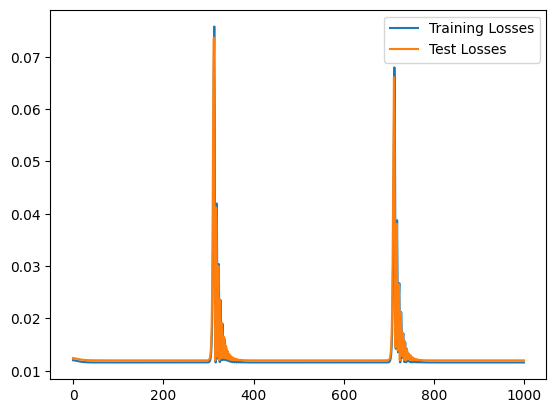

In [149]:
plt.plot(train_losses, label='Training Losses')
plt.plot(test_losses, label = 'Test Losses')
plt.legend()
plt.show()

In [152]:
#Forecasting

#Gone Wrong

validation_targets = Y[-N//2:]
validation_predictions = []

i = 0

while len(validation_predictions) < len(validation_targets):
  input = X_test[i].view(1, -1)
  p = model(input)[0,0].item() #convert array to scalar
  i += 1

  #append the predictions
  validation_predictions.append(p)

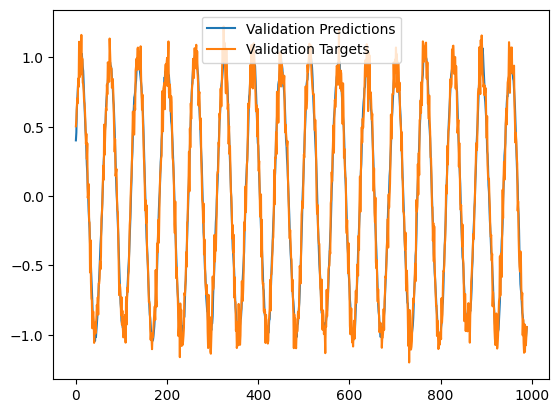

In [153]:
plt.plot(validation_predictions, label = 'Validation Predictions')
plt.plot(validation_targets, label='Validation Targets')
plt.legend()
plt.show()

In [156]:
#Forecast

#Corrections

validation_targets = Y[-N//2:]
validation_predictions = []

last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while len(validation_predictions) < len(validation_targets):
  input = last_x.view(1, -1)
  p = model(input)

  #append the predictions
  validation_predictions.append(p[0,0].item())

  last_x = torch.cat((last_x[1:], p[0]))

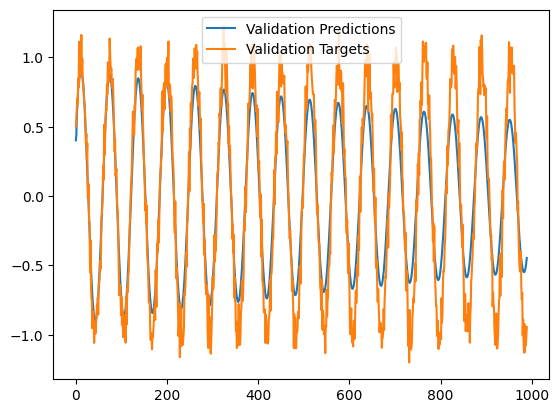

In [157]:
plt.plot(validation_predictions, label = 'Validation Predictions')
plt.plot(validation_targets, label='Validation Targets')
plt.legend()
plt.show()

In [158]:
len( validation_predictions)

990